In [1]:
import pandas as pd
import numpy as np

In [3]:
#load dataset
df = pd.read_csv("employee_churn_prediction_updated.csv")

In [ ]:
df.sample(5)

,employee_id,age,gender,education,experience_years,monthly_target,target_achievement,working_hours_per_week,overtime_hours_per_week,salary,commission_rate,job_satisfaction,work_location,manager_support_score,company_tenure_years,churn,marital_status,distance_to_office_km,churn_period
824,825,26,Male,Diploma,0,75,0.61,47,16,7172060,0.04,4,Urban,3,2.9,1,Married,44,3 Months
19,20,27,Male,Bachelor,4,131,0.57,45,5,6876345,0.07,4,Urban,4,3.3,1,Single,21,1 Month
315,316,42,Male,High School,0,190,0.84,50,1,4776238,0.04,3,Urban,2,0.7,0,Married,5,Stayed
621,622,24,Female,High School,8,77,0.79,67,13,4401471,0.07,4,Urban,4,4.5,1,Married,40,1 Month
206,207,33,Male,Diploma,4,178,0.79,67,2,6399902,0.07,4,Urban,3,1.8,0,Married,11,Stayed


In [4]:
# Info Awal Dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   employee_id              1000 non-null   int64  
 1   age                      1000 non-null   int64  
 2   gender                   1000 non-null   object 
 3   education                1000 non-null   object 
 4   experience_years         1000 non-null   int64  
 5   monthly_target           1000 non-null   int64  
 6   target_achievement       1000 non-null   float64
 7   working_hours_per_week   1000 non-null   int64  
 8   overtime_hours_per_week  1000 non-null   int64  
 9   salary                   1000 non-null   int64  
 10  commission_rate          1000 non-null   float64
 11  job_satisfaction         1000 non-null   int64  
 12  work_location            1000 non-null   object 
 13  manager_support_score    1000 non-null   int64  
 14  company_tenure_years     

In [5]:
print(df.isnull().sum())

employee_id                0
age                        0
gender                     0
education                  0
experience_years           0
monthly_target             0
target_achievement         0
working_hours_per_week     0
overtime_hours_per_week    0
salary                     0
commission_rate            0
job_satisfaction           0
work_location              0
manager_support_score      0
company_tenure_years       0
churn                      0
marital_status             0
distance_to_office_km      0
churn_period               0
dtype: int64


In [6]:
print(df.duplicated().sum())

0


In [7]:
df = df.drop(columns=["employee_id", "churn_period"], errors="ignore")
print("\n=== Kolom setelah dibuang ===")
print(df.columns)


=== Kolom setelah dibuang ===
Index(['age', 'gender', 'education', 'experience_years', 'monthly_target',
       'target_achievement', 'working_hours_per_week',
       'overtime_hours_per_week', 'salary', 'commission_rate',
       'job_satisfaction', 'work_location', 'manager_support_score',
       'company_tenure_years', 'churn', 'marital_status',
       'distance_to_office_km'],
      dtype='object')


In [8]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

print("\n=== Deteksi Outlier per Kolom Numerik ===")
for col in numeric_cols:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outlier")


=== Deteksi Outlier per Kolom Numerik ===
age: 0 outlier
experience_years: 0 outlier
monthly_target: 0 outlier
target_achievement: 0 outlier
working_hours_per_week: 0 outlier
overtime_hours_per_week: 0 outlier
salary: 0 outlier
commission_rate: 0 outlier
job_satisfaction: 0 outlier
manager_support_score: 0 outlier
company_tenure_years: 0 outlier
churn: 0 outlier
distance_to_office_km: 0 outlier


In [9]:
#1.5 Inconsistent Data Handling
for col in ["gender", "education", "work_location", "marital_status"]:
    print(f"Unique values in {col}: ", df[col].unique())

Unique values in gender:  ['Male' 'Female']
Unique values in education:  ['High School' 'Diploma' 'Bachelor']
Unique values in work_location:  ['Suburban' 'Urban' 'Rural']
Unique values in marital_status:  ['Married' 'Single']


In [10]:
#1.6 Anomaly Detection
df = df[(df["age"] >= 18) & (df["age"] <= 65)]
df = df[df["salary"] > 0]
df = df[(df["working_hours_per_week"] >= 20) & (df["working_hours_per_week"] <= 100)]
df = df[df["overtime_hours_per_week"] >= 0]

# EDA

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1000 non-null   int64  
 1   gender                   1000 non-null   object 
 2   education                1000 non-null   object 
 3   experience_years         1000 non-null   int64  
 4   monthly_target           1000 non-null   int64  
 5   target_achievement       1000 non-null   float64
 6   working_hours_per_week   1000 non-null   int64  
 7   overtime_hours_per_week  1000 non-null   int64  
 8   salary                   1000 non-null   int64  
 9   commission_rate          1000 non-null   float64
 10  job_satisfaction         1000 non-null   int64  
 11  work_location            1000 non-null   object 
 12  manager_support_score    1000 non-null   int64  
 13  company_tenure_years     1000 non-null   float64
 14  churn                    

/tmp/ipython-input-4212734566.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="churn", data=df, palette="Set2")


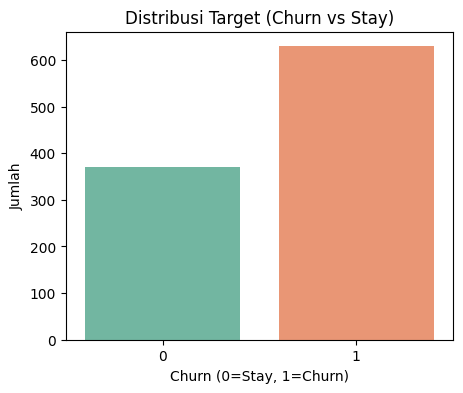

=== Jumlah Churn vs Stay ===
churn
1    629
0    371
Name: count, dtype: int64


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Distribusi Target Churn ---
plt.figure(figsize=(5,4))
sns.countplot(x="churn", data=df, palette="Set2")
plt.title("Distribusi Target (Churn vs Stay)")
plt.xlabel("Churn (0=Stay, 1=Churn)")
plt.ylabel("Jumlah")
plt.show()

print("=== Jumlah Churn vs Stay ===")
print(df["churn"].value_counts())

In [13]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from collections import Counter


# Pisahkan fitur (X) dan target (y)
X = df.drop('churn', axis=1)  # Semua fitur kecuali target
y = df['churn']  # Target kolom 'exclusive'

# Lakukan One-Hot Encoding pada kolom kategorikal
X_encoded = pd.get_dummies(X)

# Imputasi missing values dengan mean (untuk kolom numerik)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_encoded)

# Bagi data menjadi train dan test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Inisialisasi SMOTE untuk oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Lakukan oversampling untuk mengatasi ketidakseimbangan kelas
X_res, y_res = smote.fit_resample(X_train, y_train)

# Menampilkan distribusi kelas setelah oversampling
print(f"Distribusi kelas setelah oversampling: {Counter(y_res)}")

Distribusi kelas setelah oversampling: Counter({1: 512, 0: 512})


/tmp/ipython-input-711137910.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set3")


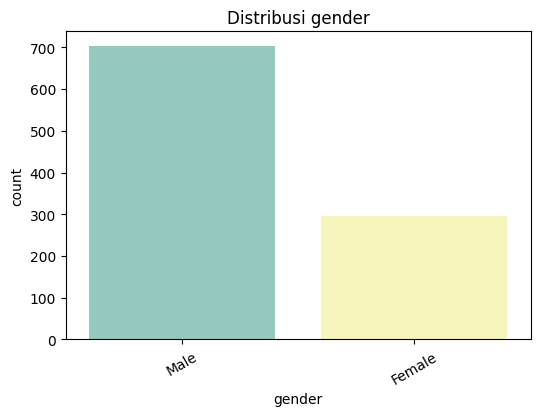

/tmp/ipython-input-711137910.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set3")


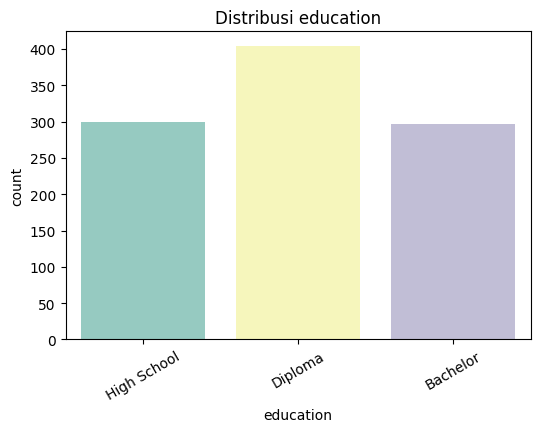

/tmp/ipython-input-711137910.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set3")


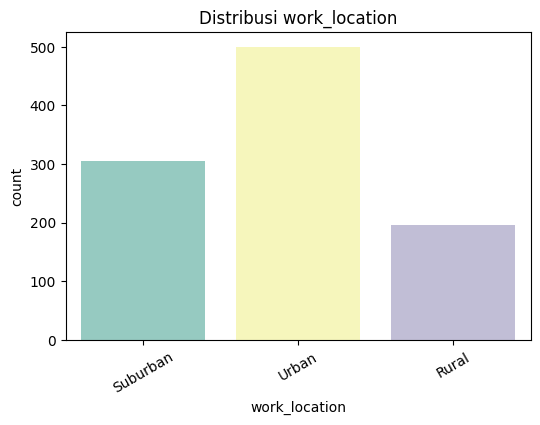

/tmp/ipython-input-711137910.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set3")


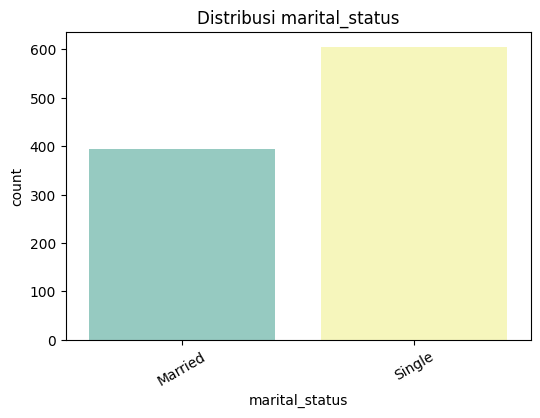

In [14]:
# --- 2. Distribusi Variabel Kategorik ---
categorical_cols = ["gender", "education", "work_location", "marital_status"]

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df, palette="Set3")
    plt.title(f"Distribusi {col}")
    plt.xticks(rotation=30)
    plt.show()

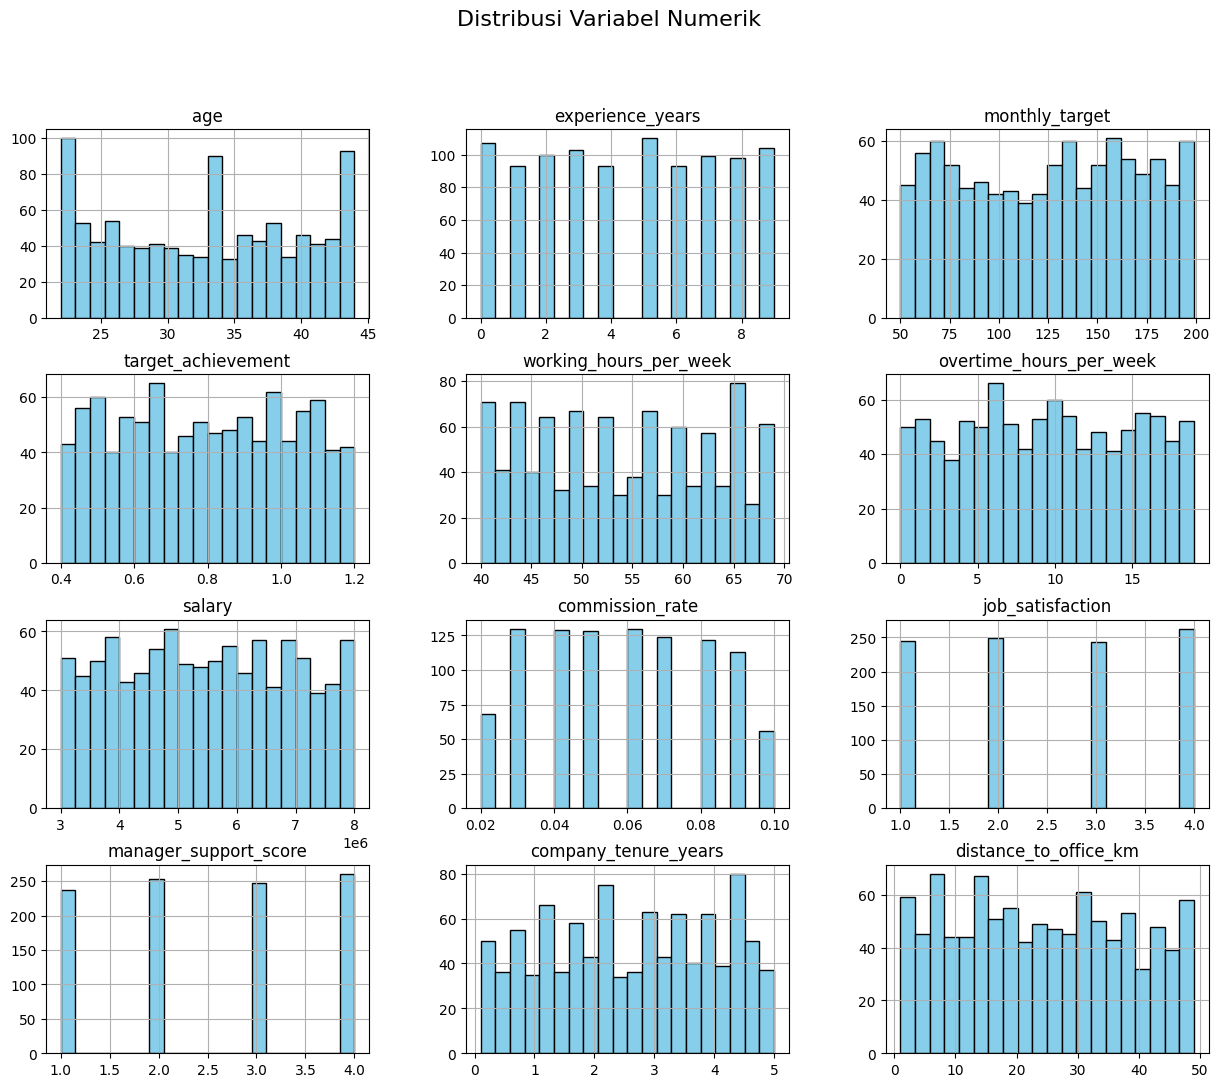

In [15]:
# --- 3. Distribusi Variabel Numerik ---
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop("churn")

df[numeric_cols].hist(bins=20, figsize=(15,12), color="skyblue", edgecolor="black")
plt.suptitle("Distribusi Variabel Numerik", fontsize=16)
plt.show()

=== Korelasi Variabel Numerik dengan Churn ===
churn                      1.000000
distance_to_office_km      0.183159
working_hours_per_week     0.176634
commission_rate            0.048573
age                        0.012841
salary                     0.010920
overtime_hours_per_week   -0.007410
monthly_target            -0.016874
experience_years          -0.019599
company_tenure_years      -0.097652
manager_support_score     -0.162443
job_satisfaction          -0.207201
target_achievement        -0.280555
Name: churn, dtype: float64


/tmp/ipython-input-1059649124.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_churn.values, y=corr_churn.index, palette="coolwarm")


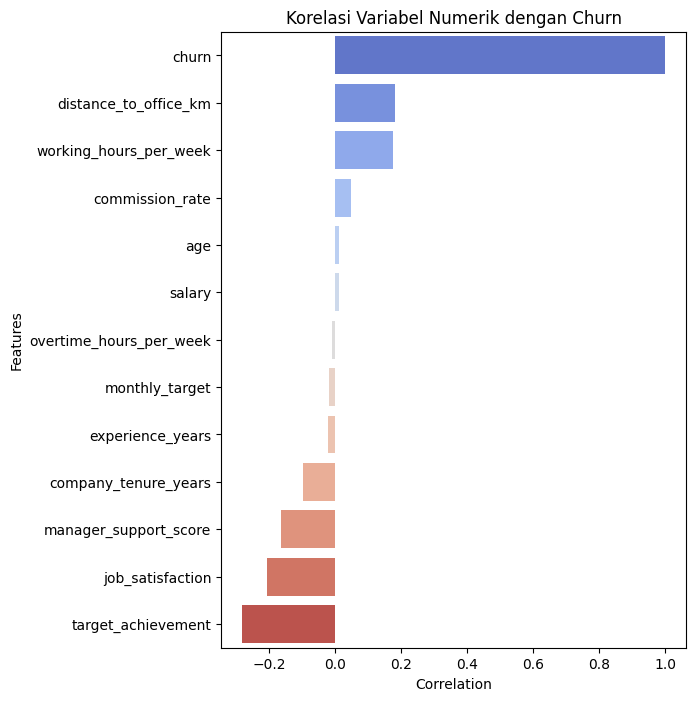

In [16]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Hitung korelasi semua numerik termasuk churn
corr = df[numeric_cols].corr()

# Fokus ke kolom churn
corr_churn = corr["churn"].sort_values(ascending=False)

print("=== Korelasi Variabel Numerik dengan Churn ===")
print(corr_churn)

# Visualisasi
plt.figure(figsize=(6,8))
sns.barplot(x=corr_churn.values, y=corr_churn.index, palette="coolwarm")
plt.title("Korelasi Variabel Numerik dengan Churn")
plt.xlabel("Correlation")
plt.ylabel("Features")
plt.show()

/tmp/ipython-input-1732676093.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="churn", y=col, data=df, palette="Set2")


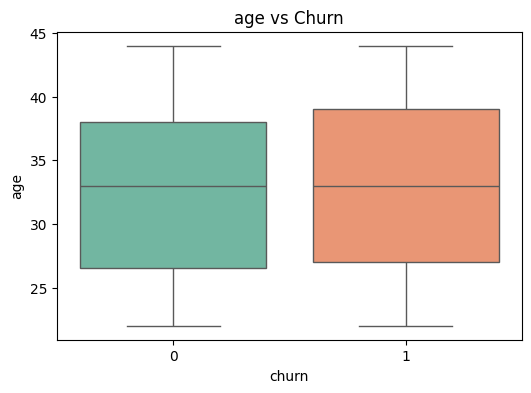

/tmp/ipython-input-1732676093.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="churn", y=col, data=df, palette="Set2")


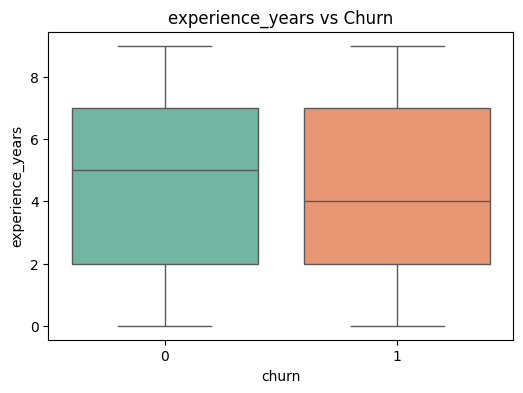

/tmp/ipython-input-1732676093.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="churn", y=col, data=df, palette="Set2")


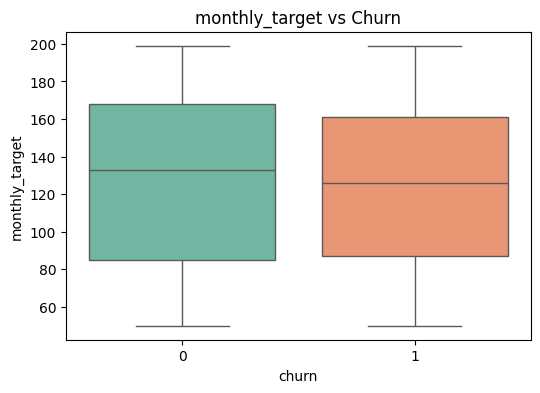

/tmp/ipython-input-1732676093.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="churn", y=col, data=df, palette="Set2")


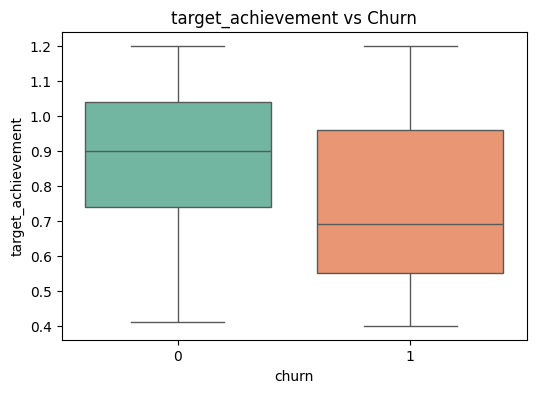

/tmp/ipython-input-1732676093.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="churn", y=col, data=df, palette="Set2")


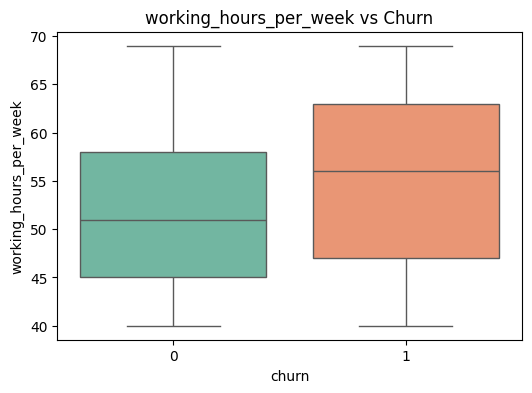

/tmp/ipython-input-1732676093.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="churn", y=col, data=df, palette="Set2")


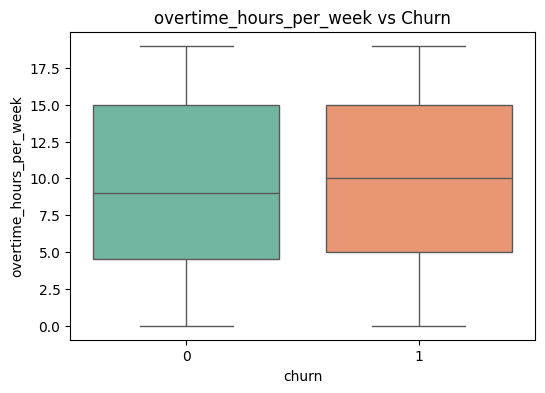

/tmp/ipython-input-1732676093.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="churn", y=col, data=df, palette="Set2")


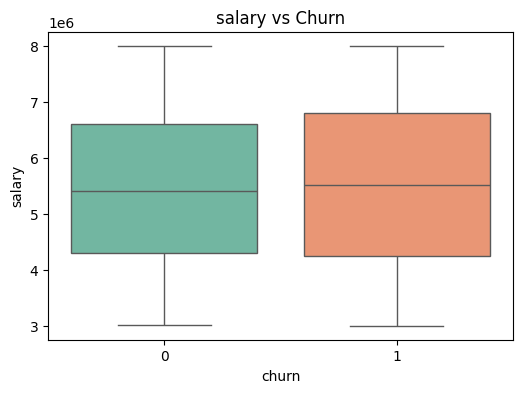

/tmp/ipython-input-1732676093.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="churn", y=col, data=df, palette="Set2")


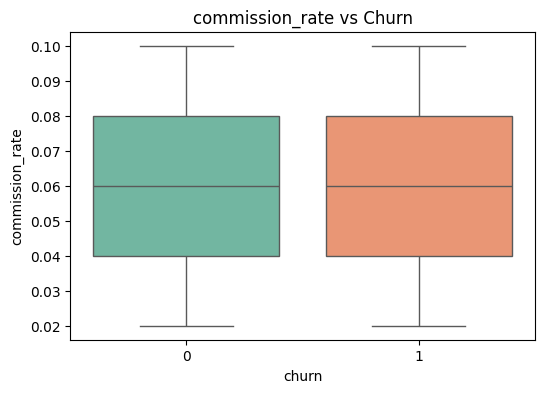

/tmp/ipython-input-1732676093.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="churn", y=col, data=df, palette="Set2")


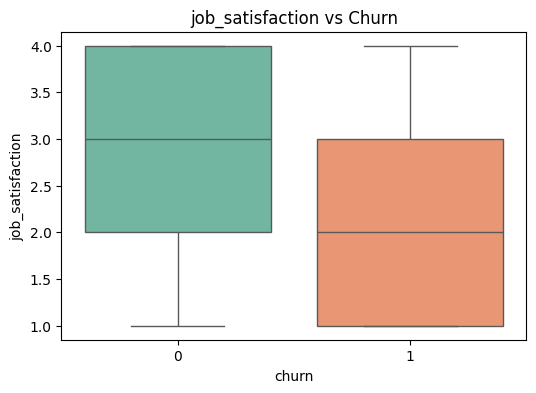

/tmp/ipython-input-1732676093.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="churn", y=col, data=df, palette="Set2")


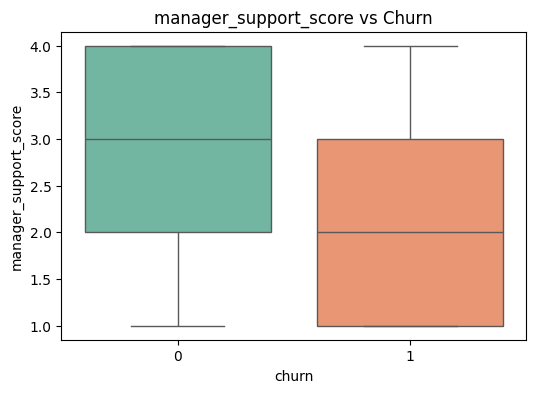

/tmp/ipython-input-1732676093.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="churn", y=col, data=df, palette="Set2")


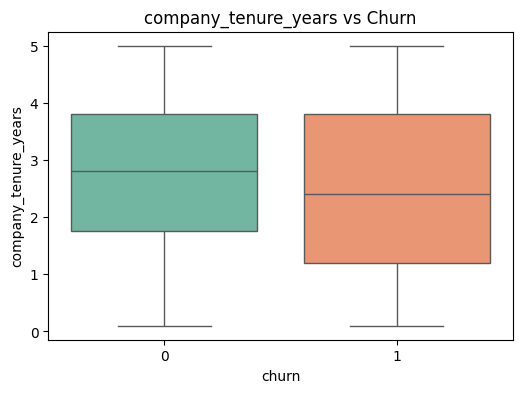

/tmp/ipython-input-1732676093.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="churn", y=col, data=df, palette="Set2")


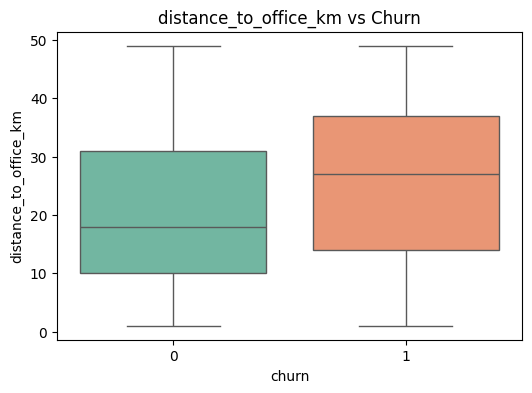

In [17]:
# --- 5. Boxplot Numerik vs Churn ---
for col in numeric_cols.drop("churn"):
    plt.figure(figsize=(6,4))
    sns.boxplot(x="churn", y=col, data=df, palette="Set2")
    plt.title(f"{col} vs Churn")
    plt.show()

experience years yg rendah, monthly target yg rendah, target achievemen yg rendah, working hours per week yang tinggi, overtime hours per week yang tinggi, gaji yang agak lebih tinggi,  job satisfaction yang rendah, manager support score yang rendah,company tenure years yang lebih rendah, distance to office yang tinggi mendorong karyawan untuk churn

In [18]:
# Feature Engineering
df["target_gap"] = df["monthly_target"] - (df["target_achievement"] * df["monthly_target"])
df["overwork_ratio"] = df["overtime_hours_per_week"] / df["working_hours_per_week"].replace(0, np.nan)
df["tenure_per_age"] = df["company_tenure_years"] / df["age"].replace(0, np.nan)
df["income_per_hour"] = df["salary"] / (df["working_hours_per_week"].replace(0, np.nan) * 4.3)
df["experience_to_tenure"] = df["experience_years"] / (df["company_tenure_years"] + 1)

print(df[[
    "target_gap", "overwork_ratio", "tenure_per_age",
    "income_per_hour", "experience_to_tenure"
]].head())

   target_gap  overwork_ratio  tenure_per_age  income_per_hour  \
0        9.18        0.145161        0.100000     17506.031508   
1       86.48        0.145455        0.065854     24750.558140   
2       89.04        0.169492        0.047222     18846.417028   
3       62.90        0.220588        0.015625     12395.991792   
4       -1.42        0.200000        0.155172     26637.348837   

   experience_to_tenure  
0              0.000000  
1              1.621622  
2              2.962963  
3              4.666667  
4              1.272727  


In [19]:
# Cek Missing Value Setelah Feature Engineering
print("=== Missing Value Setelah Tambah Fitur Baru ===")
print(df.isnull().sum()[df.isnull().sum() > 0])

=== Missing Value Setelah Tambah Fitur Baru ===
Series([], dtype: int64)


In [20]:
# Korelasi fitur baru dengan churn
new_features = ["target_gap", "overwork_ratio", "tenure_per_age",
                "income_per_hour", "experience_to_tenure"]

corr_new = df[new_features + ["churn"]].corr()["churn"].drop("churn")
print("=== Korelasi Fitur Baru dengan Churn ===")
print(corr_new.sort_values(ascending=False))


=== Korelasi Fitur Baru dengan Churn ===
target_gap              0.253260
experience_to_tenure    0.078524
overwork_ratio         -0.048857
income_per_hour        -0.081627
tenure_per_age         -0.098771
Name: churn, dtype: float64


1. target_gap (0.25) → gap makin besar → peluang churn naik.
2. experience_to_tenure (0.08) → pengalaman > tenure → churn sedikit naik.
3. overwork_ratio (-0.05) → rasio lembur tinggi → churn sedikit turun.
4. income_per_hour (-0.08) → gaji/jam tinggi → churn turun.
5. tenure_per_age (-0.10) → loyalitas tinggi → churn turun.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1000 non-null   int64  
 1   gender                   1000 non-null   object 
 2   education                1000 non-null   object 
 3   experience_years         1000 non-null   int64  
 4   monthly_target           1000 non-null   int64  
 5   target_achievement       1000 non-null   float64
 6   working_hours_per_week   1000 non-null   int64  
 7   overtime_hours_per_week  1000 non-null   int64  
 8   salary                   1000 non-null   int64  
 9   commission_rate          1000 non-null   float64
 10  job_satisfaction         1000 non-null   int64  
 11  work_location            1000 non-null   object 
 12  manager_support_score    1000 non-null   int64  
 13  company_tenure_years     1000 non-null   float64
 14  churn                    

In [22]:
df.head()

,age,gender,education,experience_years,monthly_target,target_achievement,working_hours_per_week,overtime_hours_per_week,salary,commission_rate,...,manager_support_score,company_tenure_years,churn,marital_status,distance_to_office_km,target_gap,overwork_ratio,tenure_per_age,income_per_hour,experience_to_tenure
0,28,Male,High School,0,153,0.94,62,9,4667108,0.03,...,3,2.8,0,Married,22,9.18,0.145161,0.100000,17506.031508,0.000000
1,41,Male,Diploma,6,188,0.54,55,8,5853507,0.06,...,3,2.7,1,Single,36,86.48,0.145455,0.065854,24750.558140,1.621622
2,36,Female,High School,8,159,0.44,59,10,4781336,0.07,...,2,1.7,1,Single,17,89.04,0.169492,0.047222,18846.417028,2.962963
3,32,Male,Diploma,7,185,0.66,68,15,3624588,0.05,...,2,0.5,1,Married,32,62.90,0.220588,0.015625,12395.991792,4.666667
4,29,Female,High School,7,142,1.01,45,9,5154327,0.08,...,2,4.5,0,Single,14,-1.42,0.200000,0.155172,26637.348837,1.272727


In [23]:
# Ubah tipe data kategorikal
categorical_cols = ["gender", "education", "work_location", "marital_status"]
df[categorical_cols] = df[categorical_cols].astype("category")

# Ubah target menjadi kategori
df["churn"] = df["churn"].astype("category")

# Cek ulang tipe data
print(df.dtypes)

age                           int64
gender                     category
education                  category
experience_years              int64
monthly_target                int64
target_achievement          float64
working_hours_per_week        int64
overtime_hours_per_week       int64
salary                        int64
commission_rate             float64
job_satisfaction              int64
work_location              category
manager_support_score         int64
company_tenure_years        float64
churn                      category
marital_status             category
distance_to_office_km         int64
target_gap                  float64
overwork_ratio              float64
tenure_per_age              float64
income_per_hour             float64
experience_to_tenure        float64
dtype: object


# Stage 2 & 3

In [24]:
# =========================
# 1. Import Library
# =========================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    fbeta_score, classification_report, make_scorer
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

import shap

# =========================
# 2. Split Data
# =========================
X = df.drop("churn", axis=1)
y = df["churn"].cat.codes  # pastikan churn bertipe category

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [25]:
# =========================
# 3. Preprocessor
# =========================
ordinal_col = ["education"]
ordinal_categories = [["High School", "Diploma", "Bachelor"]]
nominal_cols = ["gender", "work_location", "marital_status"]
numeric_cols = X.drop(ordinal_col + nominal_cols, axis=1).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ("edu", OrdinalEncoder(categories=ordinal_categories), ordinal_col),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore", sparse_output=False), nominal_cols),
        ("num", StandardScaler(), numeric_cols)
    ]
)

In [26]:
# transformasi ke numeric matrix
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [27]:
# =========================
# 4. Baseline Models (sebelum tuning)
# =========================
baseline_models = {
    "LogReg": LogisticRegression(max_iter=500, solver="liblinear", random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42, n_jobs=-1),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

results_baseline = []
for name, model in baseline_models.items():
    pipe = Pipeline([
        ("smote", SMOTE(random_state=42)),
        ("clf", model)
    ])
    pipe.fit(X_train_transformed, y_train)
    y_pred = pipe.predict(X_test_transformed)

    results_baseline.append({
        "Model": name,
        "F2": fbeta_score(y_test, y_pred, beta=2),
        "F1": f1_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Accuracy": accuracy_score(y_test, y_pred)
    })

df_results_baseline = pd.DataFrame(results_baseline)
print("\n=== Baseline Results (sebelum tuning) ===")
print(df_results_baseline.sort_values(by="F2", ascending=False))


=== Baseline Results (sebelum tuning) ===
              Model        F2        F1    Recall  Precision  Accuracy
3      RandomForest  0.771704  0.786885  0.761905   0.813559     0.740
4  GradientBoosting  0.771654  0.762646  0.777778   0.748092     0.695
1               SVM  0.742812  0.750000  0.738095   0.762295     0.690
2      DecisionTree  0.721154  0.731707  0.714286   0.750000     0.670
0            LogReg  0.705024  0.728033  0.690476   0.769912     0.675


In [28]:
# =========================
# 5. Model + Param Grid
# =========================
f2_scorer = make_scorer(fbeta_score, beta=2)

param_grids = {
    "LogReg": (
        Pipeline([
            ("smote", SMOTE(random_state=42)),
            ("clf", LogisticRegression(max_iter=500, solver="liblinear", random_state=42))
        ]),
        {
            "clf__C": [0.01, 0.1, 1, 10],
            "clf__penalty": ["l1", "l2"]
        }
    ),
    "SVM": (
        Pipeline([
            ("smote", SMOTE(random_state=42)),
            ("clf", SVC(probability=True, random_state=42))
        ]),
        {
            "clf__C": [0.1, 1, 10],
            "clf__kernel": ["linear", "rbf"],
            "clf__gamma": ["scale", "auto"]
        }
    ),
    "DecisionTree": (
        Pipeline([
            ("smote", SMOTE(random_state=42)),
            ("clf", DecisionTreeClassifier(random_state=42))
        ]),
        {
            "clf__max_depth": [3, 5, 10, None],
            "clf__min_samples_split": [2, 5, 10],
            "clf__criterion": ["gini", "entropy"]
        }
    ),
    "RandomForest": (
        Pipeline([
            ("smote", SMOTE(random_state=42)),
            ("clf", RandomForestClassifier(random_state=42, n_jobs=-1))
        ]),
        {
            "clf__n_estimators": [100, 200, 500],
            "clf__max_depth": [5, 10, None],
            "clf__min_samples_split": [2, 5, 10]
        }
    ),
    "GradientBoosting": (
        Pipeline([
            ("smote", SMOTE(random_state=42)),
            ("clf", GradientBoostingClassifier(random_state=42))
        ]),
        {
            "clf__n_estimators": [100, 200, 500],
            "clf__learning_rate": [0.01, 0.1, 0.2],
            # max_depth ada di base estimator (DecisionTree), default 3
        }
    )
}

In [ ]:
# =========================
# 6. GridSearchCV
# =========================
best_models = {}
for name, (pipe, params) in param_grids.items():
    print(f"Tuning {name} ...")
    grid = GridSearchCV(
        estimator=pipe,
        param_grid=params,
        scoring=f2_scorer,
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train_transformed, y_train)
    best_models[name] = grid.best_estimator_

    print(f"{name} best F2 (CV): {grid.best_score_:.4f}")
    print(f"Best params: {grid.best_params_}\n")

Tuning LogReg ...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
LogReg best F2 (CV): 0.7276
Best params: {'clf__C': 1, 'clf__penalty': 'l1'}

Tuning SVM ...
Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [ ]:
# =========================
# 7. Evaluasi di Test Set (setelah tuning)
# =========================
results_test = []
for name, pipe in best_models.items():
    y_pred = pipe.predict(X_test_transformed)
    results_test.append({
        "Model": name,
        "F2": fbeta_score(y_test, y_pred, beta=2),
        "F1": f1_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Accuracy": accuracy_score(y_test, y_pred)
    })

df_results_test = pd.DataFrame(results_test)
print("\n=== Tuned Results (setelah GridSearchCV) ===")
print(df_results_test.sort_values(by="F2", ascending=False))


=== Tuned Results (setelah GridSearchCV) ===
              Model        F2        F1    Recall  Precision  Accuracy
3      RandomForest  0.789474  0.795181  0.785714   0.804878     0.745
4  GradientBoosting  0.755906  0.747082  0.761905   0.732824     0.675
2      DecisionTree  0.751582  0.748031  0.753968   0.742188     0.680
1               SVM  0.717742  0.735537  0.706349   0.767241     0.680
0            LogReg  0.706169  0.731092  0.690476   0.776786     0.680


C:\Users\lenovo\AppData\Local\Temp\ipykernel_19368\3526365462.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importances, palette="viridis")


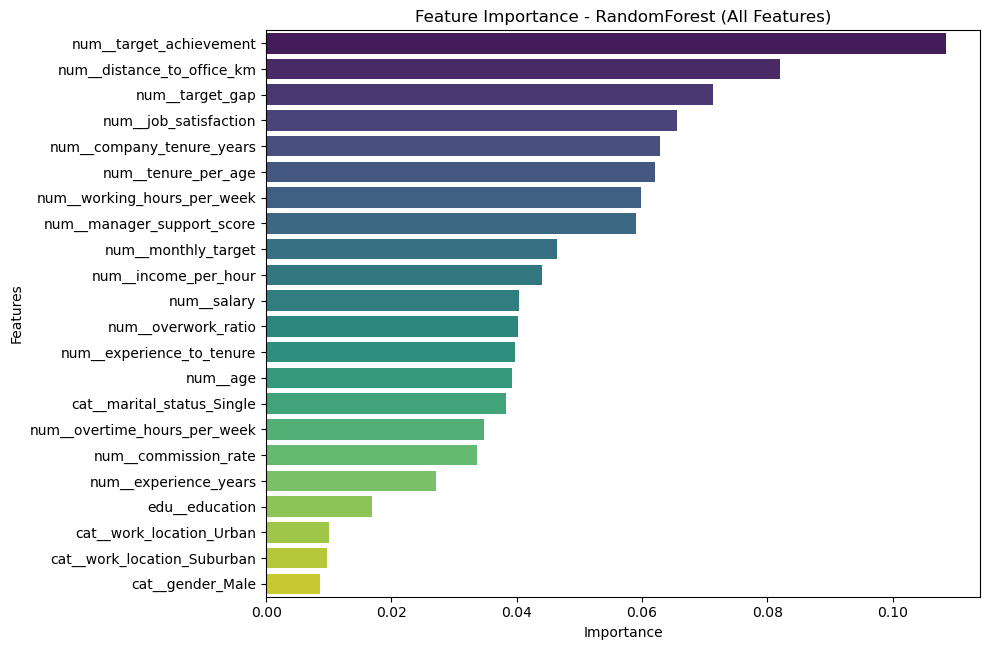


=== Feature Importance RandomForest ===
                         Feature  Importance
8        num__target_achievement    0.108504
16    num__distance_to_office_km    0.081979
17               num__target_gap    0.071313
13         num__job_satisfaction    0.065497
15     num__company_tenure_years    0.062817
19           num__tenure_per_age    0.062083
9    num__working_hours_per_week    0.059869
14    num__manager_support_score    0.059020
7            num__monthly_target    0.046441
20          num__income_per_hour    0.043964
11                   num__salary    0.040390
18           num__overwork_ratio    0.040187
21     num__experience_to_tenure    0.039682
5                       num__age    0.039193
4     cat__marital_status_Single    0.038277
10  num__overtime_hours_per_week    0.034758
12          num__commission_rate    0.033624
6          num__experience_years    0.027162
0                 edu__education    0.016819
3       cat__work_location_Urban    0.010096
2    cat__work

In [ ]:
# ==========================================
# Feature Importance dari Random Forest
# ==========================================
import seaborn as sns
import matplotlib.pyplot as plt

# Ambil model RandomForest dari pipeline hasil tuning
rf_model = best_models["RandomForest"].named_steps["clf"]

# Ambil feature names setelah preprocessing
feature_names = preprocessor.get_feature_names_out()

# Buat DataFrame importance
importances = pd.DataFrame({
    "Feature": feature_names,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot semua fitur
plt.figure(figsize=(10, len(importances) * 0.3))
sns.barplot(x="Importance", y="Feature", data=importances, palette="viridis")
plt.title("Feature Importance - RandomForest (All Features)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Print tabel importance
print("\n=== Feature Importance RandomForest ===")
print(importances)

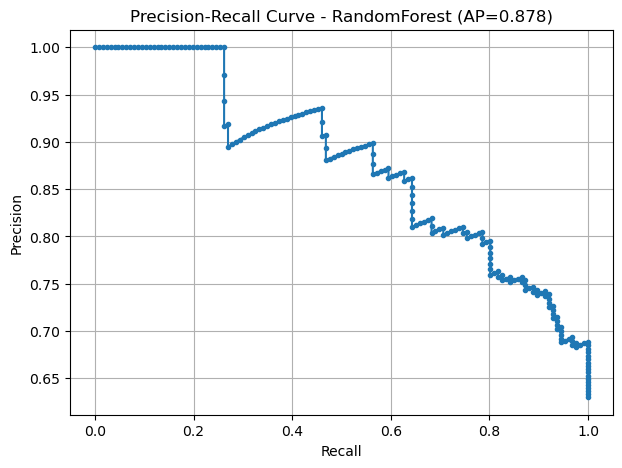

In [ ]:
# ==========================================
# Precision-Recall Curve
# ==========================================
from sklearn.metrics import precision_recall_curve, average_precision_score

# Probabilitas churn (kelas positif = 1)
y_proba = rf_model.predict_proba(X_test_transformed)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)

plt.figure(figsize=(7,5))
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall Curve - RandomForest (AP={ap:.3f})")
plt.grid(True)
plt.show()


=== Threshold Terbaik Berdasarkan F2 ===
Threshold    0.310000
Precision    0.684783
Recall       1.000000
F1           0.812903
F2           0.915698
Name: 31, dtype: float64


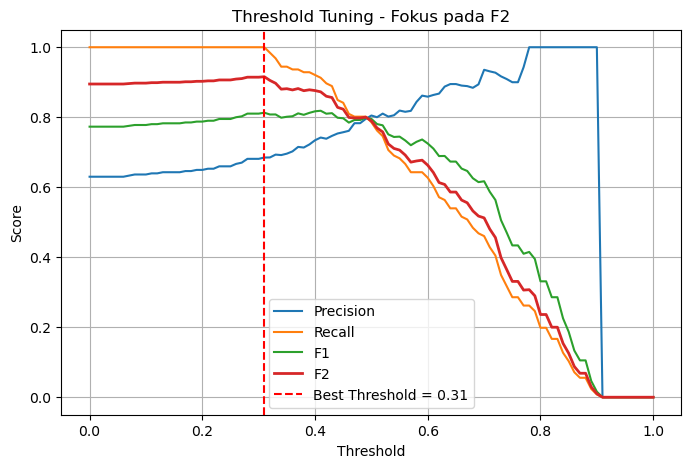

In [ ]:
# ==========================================
# Threshold tuning (F2-Score)
# ==========================================
from sklearn.metrics import precision_score, recall_score, f1_score, fbeta_score

metrics = []
for thresh in np.linspace(0, 1, 101):  # thresholds 0.00 – 1.00
    y_pred_thresh = (y_proba >= thresh).astype(int)
    precision = precision_score(y_test, y_pred_thresh, zero_division=0)
    recall = recall_score(y_test, y_pred_thresh, zero_division=0)
    f1 = f1_score(y_test, y_pred_thresh, zero_division=0)
    f2 = fbeta_score(y_test, y_pred_thresh, beta=2, zero_division=0)
    metrics.append([thresh, precision, recall, f1, f2])

# Simpan ke DataFrame
df_thresh = pd.DataFrame(metrics, columns=["Threshold", "Precision", "Recall", "F1", "F2"])

# Ambil threshold terbaik berdasarkan F2
best_f2 = df_thresh.loc[df_thresh["F2"].idxmax()]
best_thresh = best_f2["Threshold"]

print("\n=== Threshold Terbaik Berdasarkan F2 ===")
print(best_f2)

# Visualisasi metrik terhadap threshold
plt.figure(figsize=(8,5))
plt.plot(df_thresh["Threshold"], df_thresh["Precision"], label="Precision")
plt.plot(df_thresh["Threshold"], df_thresh["Recall"], label="Recall")
plt.plot(df_thresh["Threshold"], df_thresh["F1"], label="F1")
plt.plot(df_thresh["Threshold"], df_thresh["F2"], label="F2", linewidth=2)

plt.axvline(x=best_thresh, color="red", linestyle="--",
            label=f"Best Threshold = {best_thresh:.2f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Threshold Tuning - Fokus pada F2")
plt.legend()
plt.grid(True)
plt.show()

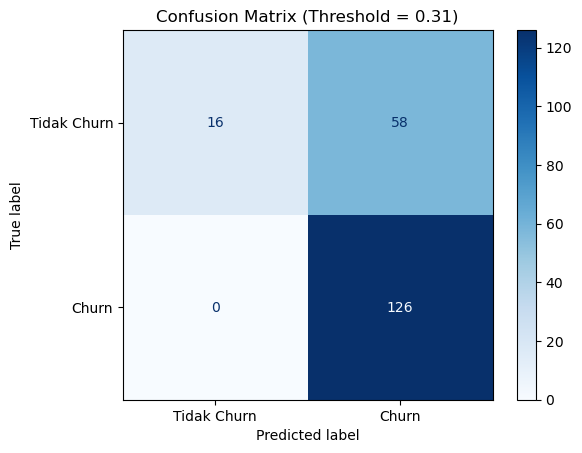

Confusion Matrix:
 [[ 16  58]
 [  0 126]]

=== Classification Report (Threshold = 0.31) ===
              precision    recall  f1-score   support

    Stay (0)       1.00      0.22      0.36        74
   Churn (1)       0.68      1.00      0.81       126

    accuracy                           0.71       200
   macro avg       0.84      0.61      0.58       200
weighted avg       0.80      0.71      0.64       200



In [ ]:
# ==========================================
# Confusion Matrix & Classification Report
# ==========================================
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Prediksi dengan threshold terbaik
y_pred_best = (y_proba >= best_thresh).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Tidak Churn", "Churn"])
disp.plot(cmap="Blues", values_format="d")
plt.title(f"Confusion Matrix (Threshold = {best_thresh:.2f})")
plt.show()

print("Confusion Matrix:\n", cm)

# Classification Report
print(f"\n=== Classification Report (Threshold = {best_thresh:.2f}) ===")
print(classification_report(y_test, y_pred_best, target_names=["Stay (0)", "Churn (1)"]))

In [ ]:
# cek bias
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, fbeta_score
df_test = X_test.copy()
df_test["y_true"] = y_test.values
df_test["y_pred"] = y_pred_best
df_test["y_proba"] = y_proba
features_to_check = ["gender", "education", "work_location", "marital_status"]
def compute_metrics(y_true, y_pred):
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred, zero_division=0),
        "recall": recall_score(y_true, y_pred, zero_division=0),
        "f1": f1_score(y_true, y_pred, zero_division=0),
        "f2": fbeta_score(y_true, y_pred, beta=2, zero_division=0)
    }
group_results = {}

for feat in features_to_check:
    rows = []
    for val, d in df_test.groupby(feat):
        rows.append((val, compute_metrics(d["y_true"], d["y_pred"])))
    group_results[feat] = pd.DataFrame(
        {val: metrics for val, metrics in rows}
    ).T

for feat, df_bias in group_results.items():
    print(f"\n=== Performa Model berdasarkan {feat} ===")
    print(df_bias.round(3))


C:\Users\lenovo\AppData\Local\Temp\ipykernel_19368\3543191103.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for val, d in df_test.groupby(feat):
C:\Users\lenovo\AppData\Local\Temp\ipykernel_19368\3543191103.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for val, d in df_test.groupby(feat):
C:\Users\lenovo\AppData\Local\Temp\ipykernel_19368\3543191103.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for v


=== Performa Model berdasarkan gender ===
        accuracy  precision  recall     f1     f2
Female     0.833      0.811     1.0  0.896  0.956
Male       0.657      0.634     1.0  0.776  0.896

=== Performa Model berdasarkan education ===
             accuracy  precision  recall     f1     f2
Bachelor        0.667      0.653     1.0  0.790  0.904
Diploma         0.732      0.707     1.0  0.828  0.923
High School     0.716      0.683     1.0  0.812  0.915

=== Performa Model berdasarkan work_location ===
          accuracy  precision  recall     f1     f2
Rural        0.702      0.667     1.0  0.800  0.909
Suburban     0.741      0.708     1.0  0.829  0.924
Urban        0.697      0.681     1.0  0.810  0.914

=== Performa Model berdasarkan marital_status ===
         accuracy  precision  recall     f1     f2
Married     0.725      0.718     1.0  0.836  0.927
Single      0.700      0.660     1.0  0.795  0.907


Shape shap_values_pos: (200, 22)
Shape X_test_shap: (200, 22)


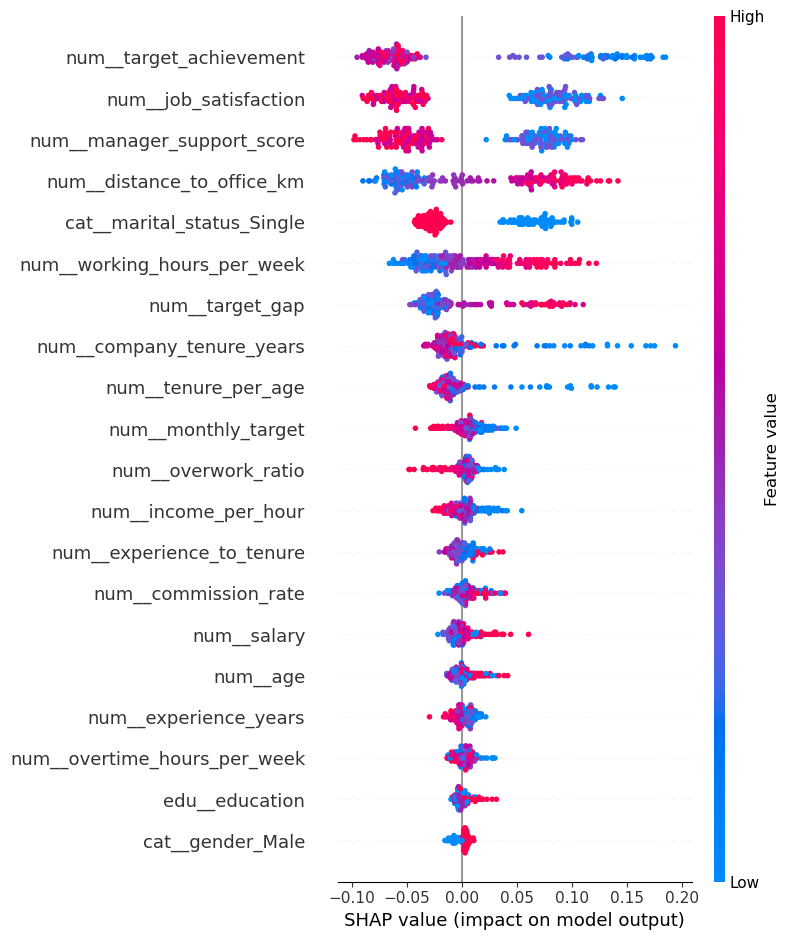

In [ ]:
import shap
import pandas as pd

# =============================
# Ambil model terbaik RandomForest
# =============================
best_rf = best_models["RandomForest"].named_steps["clf"]

# Ambil nama fitur hasil preprocessing
feature_names = preprocessor.get_feature_names_out()

# Bikin DataFrame biar jelas kolomnya
X_test_shap = pd.DataFrame(X_test_transformed, columns=feature_names)

# Jalankan SHAP
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test_shap)

# Handle output shap_values
if isinstance(shap_values, list):
    # format lama: list per kelas
    shap_values_pos = shap_values[1]
else:
    # format baru: 3D array (n_samples, n_features, n_classes)
    shap_values_pos = shap_values[:, :, 1]

print("Shape shap_values_pos:", shap_values_pos.shape)
print("Shape X_test_shap:", X_test_shap.shape)

# Plot summary plot
shap.summary_plot(shap_values_pos, X_test_shap, feature_names=feature_names)


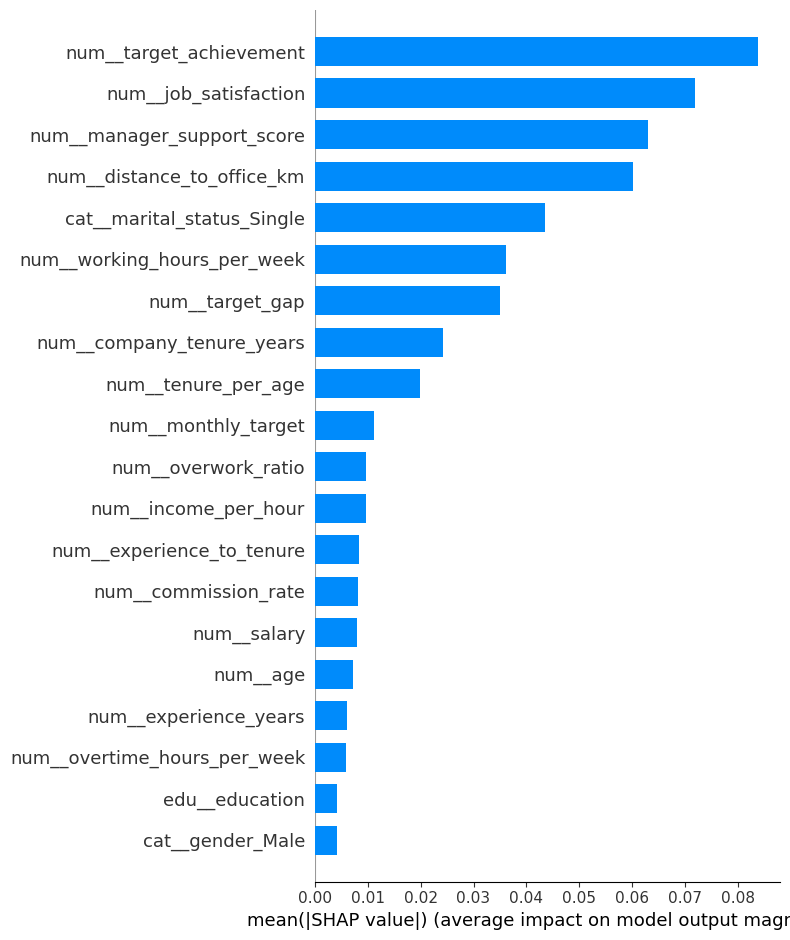

In [ ]:
# SHAP Bar Plot (mean absolute value)
# =============================
shap.summary_plot(
    shap_values_pos,
    X_test_shap,
    feature_names=feature_names,
    plot_type="bar"
)